<a href="https://colab.research.google.com/gist/lokesh-18a/9f538078f1ba629b1d9f1db4eef76d94/ea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

**Generation of Distribution**

In [6]:
shape = 7
scale = 10
n = 1000
data = np.random.gamma(shape,scale,n)
df = pd.DataFrame(data,columns=['Data'])
df.to_excel('Data_.xlsx',index=False)

In [7]:
from google.colab import files
files.download('Data_.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df = pd.read_excel(r'/content/Data_.xlsx')
df.head()

,Data
0,78.333409
1,67.692532
2,94.793017
3,63.808820
4,44.304206


**Plot of the Data**

We see that there are 1000 samples of data. To get a sense of the distribution, we should plot a histogram.

(array([ 54., 181., 264., 248., 133.,  71.,  34.,   7.,   5.,   3.]),
 array([ 14.23893453,  31.54772488,  48.85651523,  66.16530558,
         83.47409593, 100.78288629, 118.09167664, 135.40046699,
        152.70925734, 170.01804769, 187.32683804]),
 <BarContainer object of 10 artists>)

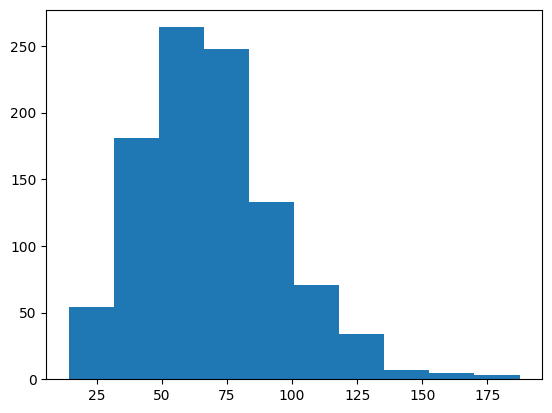

In [9]:
plt.hist(df['Data'],bins=10)

# Fitting a Gamma distribution
From the histogram, the distribution could be modelled as Gamma$(\alpha,\beta)$. The next step is to estimate $\alpha$ and $\beta$ from the given samples.

## Method of moments
Suppose $m_1$ and $m_2$ are the first and second moments of the samples. The method of moments estimates are obtained by solving
$$m_1=\frac{\alpha}{\beta},$$
$$m_2=\frac{\alpha^2}{\beta^2}+\frac{\alpha}{\beta^2}.$$
The solution results in
$$\hat{\alpha}_{MM}=\frac{m_1^2}{m_2-m_1^2}=\frac{m_1^2}{s^2},\hat{\beta}_{MM}=\frac{m_1}{m_2-m_1^2}=\frac{m_1}{s^2}.$$
We now compute the values of $m_1$ (sample mean) and $s^2=m_2-m_1^2$ (sample variance) from the data. After that, we can compute the estimates.

In [10]:
x = np.array(df['Data'])
m1 = np.average(x)
ss = np.var(x)
print(m1)
print(ss)

68.81857015104825
701.9229583663482


In [11]:
alphaMM = m1*m1/ss
betaMM = m1/ss
print(alphaMM)
print(betaMM)

6.747172949944934
0.09804291102148337


We can plot the density of the Gamma on top of the density histogram to check if the estimate gives a reasonable fit.

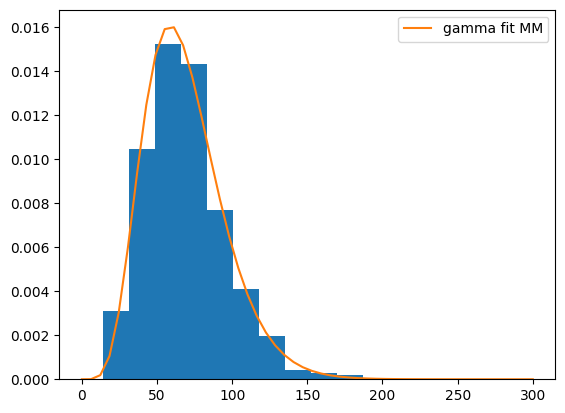

In [12]:
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=10)
xx = np.linspace(0,300,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),label='gamma fit MM')
ax.legend(loc='best')
plt.show()

# Bootstrap
How do we find the bias and variance of the estimator? Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases. Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found $\hat{\alpha}_{MM}=6.9399...$ and $\hat{\beta}_{MM}=0.0995...$. Using these values, we simulate $n=1000$ *iid* samples from Gamma$(6.9399...,0.0995...)$ and, using the simulated samples, we compute new estimates of $\alpha$ and $\beta$ and call them $\hat{\alpha}_{MM}(1)$ and $\hat{\beta}_{MM}(1)$. Now, repeat the simulation $N$ times to get estimates $\hat{\alpha}_{MM}(i)$ and $\hat{\beta}_{MM}(i)$, $i=1,2,\ldots,N$.

The sample variance of $\{\hat{\alpha}_{MM}(1), \hat{\alpha}_{MM}(2),\ldots,\hat{\alpha}_{MM}(N)\}$ is taken to be the bootstrap estimate for the variance of the estimator.

In [13]:
N = 1000
n = 1000
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM,scale=1/betaMM,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  alpha_hat[i] = m1i*m1i/ssi; beta_hat[i] = m1i/ssi

**Histogram for Estimates**

We can see the histograms of the estimates to get an idea of the spread of the values.

(array([ 2.00496895,  8.35403729, 37.76024854, 63.15652189, 76.85714304,
        73.84968961, 41.43602494, 21.72049695,  7.01739132,  2.00496895]),
 array([0.08365981, 0.08665238, 0.08964494, 0.09263751, 0.09563007,
        0.09862264, 0.1016152 , 0.10460777, 0.10760033, 0.1105929 ,
        0.11358546]),
 <BarContainer object of 10 artists>)

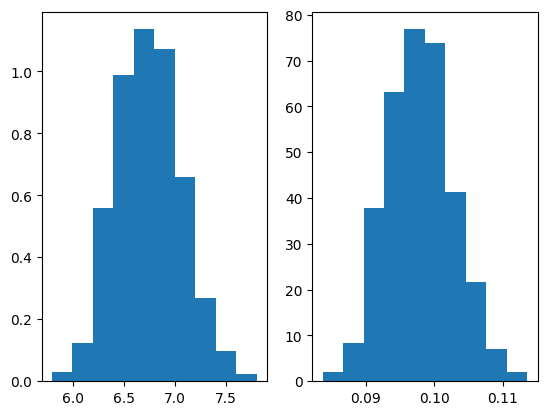

In [14]:
ax1 = plt.subplot(121)
ax1.hist(alpha_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(beta_hat,density=True)

The histograms look roughly normal.

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [15]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.32038672701194104
0.0048258721507045375


## Confidence intervals
Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{\alpha}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{\alpha}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{\alpha}{2}-\frac{\alpha}{2}=1-\alpha.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-\alpha,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-\alpha)$% confidence interval.

## Bootstrap confidence intervals
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{\alpha}_{MM}(1)-6.9399...,\ldots,\hat{\alpha}_{MM}(N)-6.9399...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [16]:
del1 = np.percentile(alpha_hat - alphaMM, 97.5)
del2 = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1,del2])

[0.6399805868734819, -0.5712460847101327]


The 95% confidence interval for $\alpha$ using the method of moments estimator works out to $[6.9399-0.7571,6.9399-(-0.5777)]=[6.1828,7.5176]$.

## Maximum likelihood
We now turn to the maximum likelihood estimator for $\alpha$ and $\beta$. The likelihood $L(x_1,\ldots,x_n)$ can be written as
$$L = \frac{\beta^\alpha}{\Gamma(\alpha)}x_1^{\alpha-1}e^{-\beta x_1}\,\frac{\beta^\alpha}{\Gamma(\alpha)}x_2^{\alpha-1}e^{-\beta x_2}\cdots \frac{\beta^\alpha}{\Gamma(\alpha)}x_n^{\alpha-1}e^{-\beta x_n}= \frac{\beta^{n\alpha}}{\Gamma(\alpha)^n}(x_1\cdots x_n)^{\alpha-1}e^{-\beta(x_1+\cdots+x_n)},$$
$$\log L = n\alpha\log\beta-n\log\Gamma(\alpha)+(\alpha-1)\log(x_1\cdots x_n)-\beta(x_1+\cdots+x_n).$$
Differentiating $\log L$ with respect to $\beta$ and equating to zero, we get
$$n\alpha\frac{1}{\beta}-(x_1+\cdots+x_n)=0,\text{or }\alpha=\beta \frac{x_1+\cdots+x_n}{n}.$$
Differentiating $\log L$ with respect to $\alpha$ and equating to zero, we get
$$n\log\beta-n\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}+\log(x_1\cdots x_n)=0.$$
So, we get two equations in the two variables $\alpha$ and $\beta$. However, the equations do not have a closed form solution, and we need to solve them numerically or approximately. From the first equation, we have $\log\beta=\log\alpha-\log\frac{x_1+\cdots+x_n}{n}$. Using this in the second equation, we get
$$\log\alpha - \frac{\Gamma'(\alpha)}{\Gamma(\alpha)}=\log\frac{x_1+\cdots+x_n}{n}-\frac{1}{n}\log(x_1\cdots x_n).$$
We will now solve the above equation to find the ML estimate of $\alpha$. This will be a numerical solution.

In [17]:
lm1 = np.average(np.log(x))
from scipy.special import digamma
fML = lambda a: (np.log(a) - digamma(a) - np.log(m1)+lm1)

We can plot the above function to see how it looks.

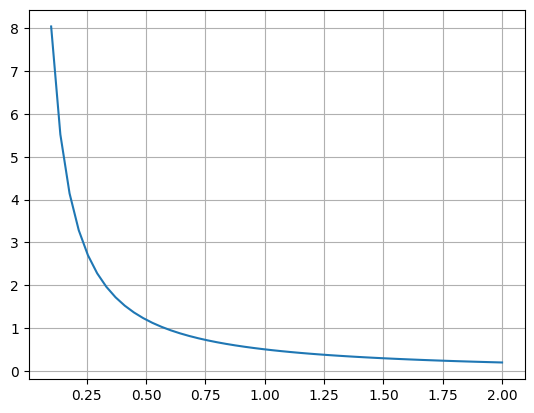

In [18]:
fig, ax = plt.subplots(1,1)
xx = np.linspace(0.1,2,50)
ax.plot(xx,fML(xx))
ax.grid(True)
plt.show()

In [19]:
import scipy.optimize as sopt
sol = sopt.root_scalar(fML, bracket=[0.1,10])
sol.root

6.671755112396601

In [20]:
alphaML = sol.root
betaML = alphaML/m1
print([alphaML, betaML])

[6.671755112396601, 0.0969470173203675]


Let us check the fit with the histogram.

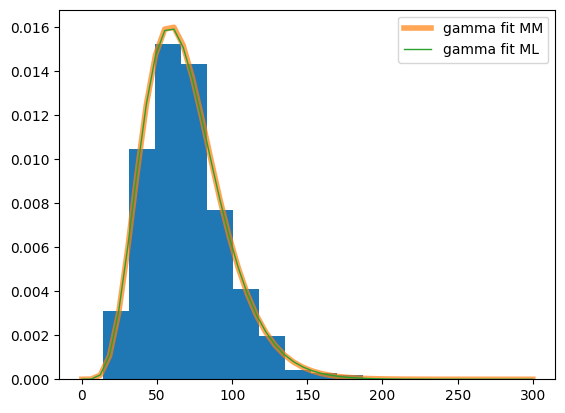

In [21]:
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=10)
xx = np.linspace(0,300,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),lw='4',alpha=0.7,label='gamma fit MM')
ax.plot(xx, st.gamma.pdf(xx,alphaML,scale=1/betaML),lw='1',label='gamma fit ML')
ax.legend(loc='best')
plt.show()

Both the curves are on top of each other showing very good fit. Let us use the bootstrap method to find variance and confidence intervals for the ML estimator.

In [22]:
N = 1000
n = 1000
alpha_hatML = np.zeros(N)
beta_hatML = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM,scale=1/betaMM,size=n)
  m1i = np.average(xi); lm1i = np.average(np.log(xi))
  fMLi = lambda a: (np.log(a) - digamma(a) - np.log(m1i)+lm1i)
  soli = sopt.root_scalar(fMLi, bracket = [0.1,10])
  alpha_hatML[i] = soli.root; beta_hatML[i] = soli.root / m1i

In [23]:
print(np.sqrt(np.var(alpha_hatML)))
print(np.sqrt(np.var(beta_hatML)))

0.29469313393471797
0.004429272520234984


We see that the variance of the bootstrap ML estimator is lesser than that of bootstrap MM estimator.